In [1]:
import pandas as pd

data = {
    "Kick Order": [1, 2, 3, 4, 5],
    "No Goal": [15, 16, 16, 21, 13],
    "Goal Scored": [45, 44, 44, 37, 24]
}

df = pd.DataFrame(data)
print(df)

   Kick Order  No Goal  Goal Scored
0           1       15           45
1           2       16           44
2           3       16           44
3           4       21           37
4           5       13           24


In [18]:
# melted = pd.melt(df)
# print(melted)
# Unpivot into row-level data
rows = []
for _, row in df.iterrows():
    rows.extend([{"Kick Order": row["Kick Order"], "Outcome": "No Goal"}] * int(row["No Goal"]))
    rows.extend([{"Kick Order": row["Kick Order"], "Outcome": "Goal Scored"}] * int(row["Goal Scored"]))

df_long = pd.DataFrame(rows)
print(df_long)

     Kick Order      Outcome
0             1      No Goal
1             1      No Goal
2             1      No Goal
3             1      No Goal
4             1      No Goal
..          ...          ...
270           5  Goal Scored
271           5  Goal Scored
272           5  Goal Scored
273           5  Goal Scored
274           5  Goal Scored

[275 rows x 2 columns]


In [24]:
# Basic crosstab (counts)
table = pd.crosstab(df_long["Kick Order"], df_long["Outcome"], margins=True, normalize="index") * 100
print(table)


Outcome     Goal Scored    No Goal
Kick Order                        
1             75.000000  25.000000
2             73.333333  26.666667
3             73.333333  26.666667
4             63.793103  36.206897
5             64.864865  35.135135
All           70.545455  29.454545


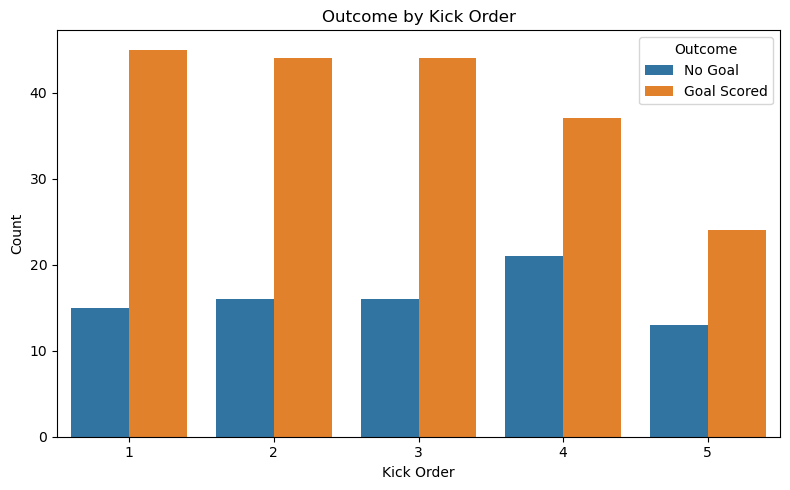

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn countplot directly from long data
plt.figure(figsize=(8, 5))
sns.countplot(data=df_long, x="Kick Order", hue="Outcome")

plt.title("Outcome by Kick Order")
plt.ylabel("Count")
plt.xlabel("Kick Order")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()



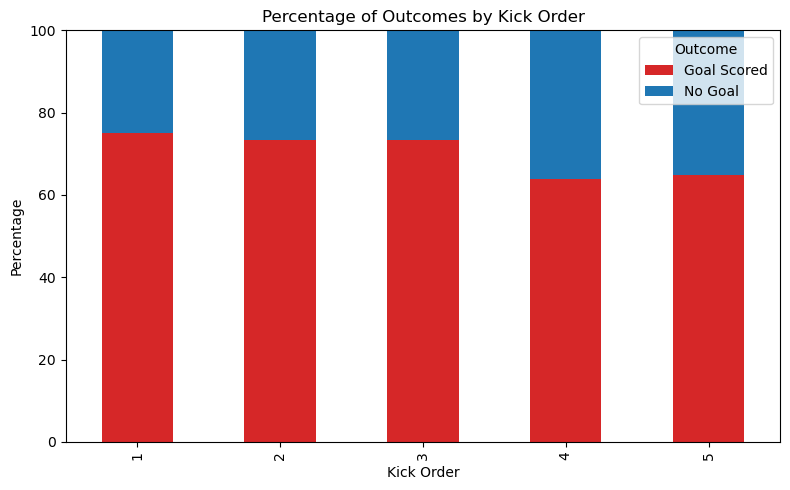

In [27]:
# Step 2: Get row-wise percentages (i.e. % for each Kick Order)
row_pct = pd.crosstab(df_long["Kick Order"], df_long["Outcome"], normalize="index") * 100

# Step 3: Plot it
row_pct.plot(kind="bar", stacked=True, figsize=(8, 5), color=["#d62728", "#1f77b4"])

plt.title("Percentage of Outcomes by Kick Order")
plt.ylabel("Percentage")
plt.xlabel("Kick Order")
plt.legend(title="Outcome")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()